In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

2024-11-05 04:24:11.201231: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 04:24:11.232965: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 04:24:11.250961: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730798651.274080  797511 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730798651.282817  797511 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 04:24:11.307380: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Loading the MNIST data from keras.datasets

In [3]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [6]:
#print an image
print(X_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [7]:
#checking the dimension of the 5th image
print(X_train[5].shape)

(28, 28)


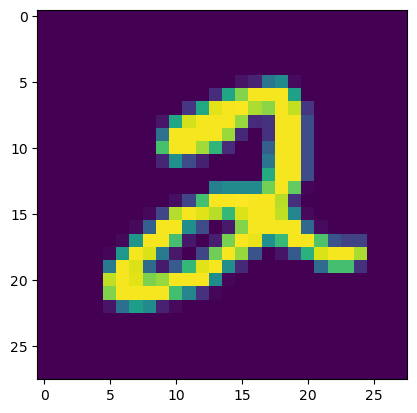

2


In [8]:
# dispay the image
plt.imshow(X_train[5])
plt.show()

# print the corresponding label of the 5th image
print(Y_train[5])

In [9]:
#checking how may unique values are available which helps when creating the neural layers
print(np.unique(Y_train))
print(np.unique(Y_test))

# here we use np.unique() instead of unique() because it is a numpy array

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [10]:
# scaling the values(her scaling is important in order to increase the accuracy of our model to put it in a more managable range of between 0 - 1)

X_train = X_train/255
X_test = X_test/255

# we do not scale Y because it is the result being predicted we only do this for X

In [11]:

# printing an image to make sure the scaling worked image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [12]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),# incase of an RGB image we will add the channel parameter(eras.layers.Flatten(input_shape=(28,28,3)))
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')# here 10 is specific because we have 10 specific values to be predicted
])

/home/kayi/anaconda3/envs/tensor/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-11-05 04:24:26.620687: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',# here if it is a one hot we use (categorical_crossentropy)
              metrics=['accuracy'])

Training the Neural Network

In [14]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10


2024-11-05 04:24:27.436792: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8471 - loss: 0.5234
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9572 - loss: 0.1436
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9705 - loss: 0.1020
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9764 - loss: 0.0797
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9804 - loss: 0.0638
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9842 - loss: 0.0526
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9860 - loss: 0.0445
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9878 - loss: 0.0384
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9898 - loss: 0.0326
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9902 - loss: 0.0306


Training accuracy = 99.02%

Accuracy on training data

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9636 - loss: 0.1400
0.9685999751091003


Test data accuray = 96.86 %

In [16]:
print(X_test.shape)

(10000, 28, 28)


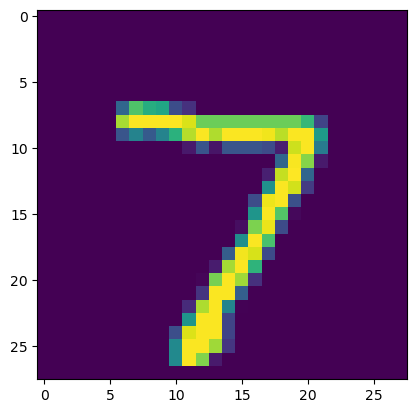

7


In [17]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

# corresponding lacel
print(Y_test[0])

Prediction

In [18]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [19]:
print(Y_pred.shape)

(10000, 10)


In [20]:
print(Y_pred[0])

[1.3152628e-01 9.2962310e-02 1.1468747e-02 9.2626071e-01 3.8693412e-05
 1.0924525e-01 8.9105961e-06 9.9999982e-01 4.1015273e-01 9.6921331e-01]


we receive thjis kind of results because when you use predict it gives the answer in terms of prbability and the highest probability value is the correct value

For easier time we convert the probabilities to class label

In [21]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [22]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [23]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    3,    2,    2,    1,    2,    1,    2,   10],
       [   0, 1098,    2,    2,    5,    1,   11,    2,   14,    0],
       [   4,    2, 1002,    7,    2,    0,    3,    7,    5,    0],
       [   0,    0,    4,  984,    0,    8,    0,    8,    3,    3],
       [   0,    0,    2,    0,  966,    0,    5,    2,    0,    7],
       [   3,    0,    0,   18,    2,  852,    7,    3,    5,    2],
       [   6,    1,    2,    3,    1,    4,  939,    0,    1,    1],
       [   1,    1,    8,    5,    3,    0,    0, 1000,    1,    9],
       [   3,    0,    3,   13,    4,    6,    4,    4,  932,    5],
       [   0,    2,    0,    9,   24,    5,    4,    5,   11,  949]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

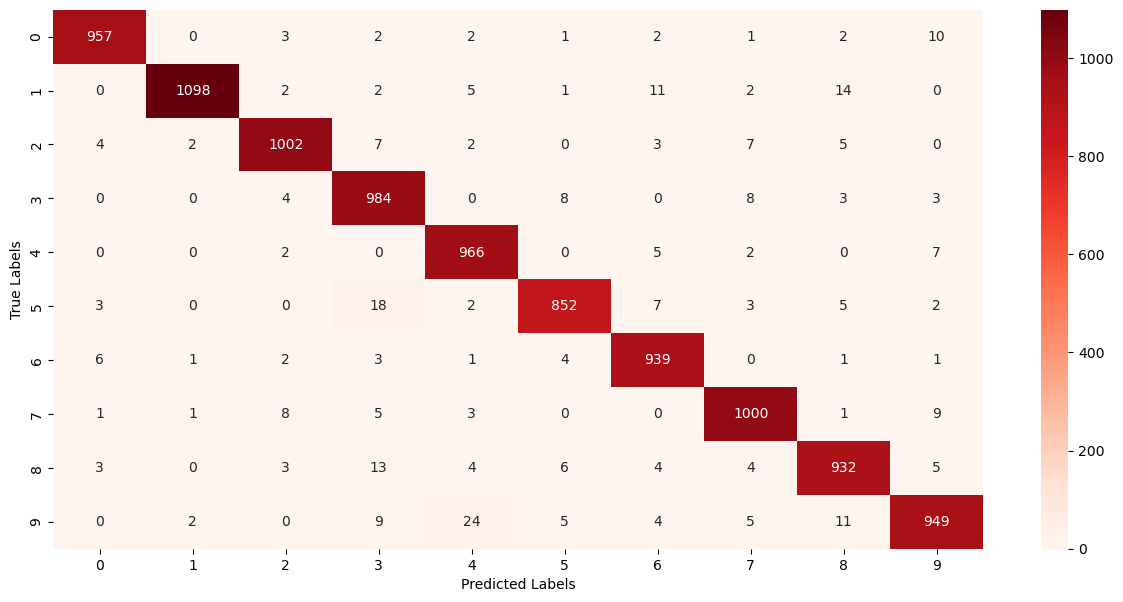

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [33]:
# read in the image
img_path ='/home/kayi/Desktop/ML_projects/MNIST Digital classification with NN/MNIST_digit.png'
img = cv2.imread(img_path)

In [34]:
import os

image_path = '/home/kayi/Desktop/ML_projects/MNIST Digital classification with NN/MNIST_digit.png'
if not os.path.exists(image_path):
    print(f"Image file does not exist: {image_path}")
else:
    print(f"Image found at: {image_path}")


Image found at: /home/kayi/Desktop/ML_projects/MNIST Digital classification with NN/MNIST_digit.png


In [35]:
type(img)

numpy.ndarray

In [36]:
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [37]:
img.shape

(318, 318, 3)

In [38]:
type(img)

numpy.ndarray